In [99]:
def IDRF(P,D,dt,t_for=5,t_trun=5,gauss_t=0.7,accept_mis=-0.1):
    """Iterative Deconvolution and Receiver-Function Estimation in time domain"""

    t_max = t_for;

    misfit = 1.;
    misfit_old = 99999.;
    misfit_ref = sqrt(sum(D**2));

    RF = zeros(len(P));

    D_cur = D;

    itmax = 400;

    itnum = 0;
    for itnum in range(itmax):
        amp_corr  = correlate(D_cur,P,'same');
        auto_corr = correlate(P,P);
        ind = argmax(abs(amp_corr));
        amp_rf = amp_corr[ind]/auto_corr;
        RF[ind] = RF[ind]+amp_rf;
        D_sub = convolve(P,RF,'same');
        D_cur = D - D_sub;
        misfit_old = misfit;
        misfit = sqrt(sum(D_cur**2))/misfit_ref;
        itnum = itnum+1;
        
        #from matplotlib import pylab as plt
        #plt.plot(RF)
        #plt.plot(D_sub)
        #plt.show()
        #break
        
        print(misfit, accept_mis)
        
        if itnum == itmax or (misfit_old - misfit) < accept_mis :
            break

    RF_Time = (arange(len(P)) - len(P)/2.)*dt;

    RF[RF_Time>t_trun]=0;
    RF = RF[RF_Time<=t_max];
    RF_Time = RF_Time[RF_Time<=t_max];

    if gauss_t != 0:
        gauss_sig = gauss_t/dt;
        x = linspace(-gauss_sig*4,gauss_sig*4,gauss_sig*8);
        Gauss_win = exp(-x**2/(2*gauss_sig**2));
        RF = convolve(RF,Gauss_win,'same');


    RF = RF[::-1];
    RF_Time = RF_Time[::-1];
    
    return RF_Time, RF

In [114]:
from scipy.signal import gaussian
from numpy.random import randn, rand

P=gaussian(1000,1)

for num in range(4):
    i1 = int(randn()*10)
    num=150
    P[450+i1:450+num+i1] = P[450+i1:450+num+i1] + gaussian(num,5+randn()*1)*randn()


D=P.copy()
D[:800] = gaussian(800,10)

for num in range(25):
    num = int(rand()*500 + 200)
    D[:num] = D[:num] + gaussian(num,5+randn()*1)*randn()

dt = 0.1

RF_Time, RF =IDRF(P,D,dt)



0.885002976184 -0.1
0.75759295849 -0.1
0.659294098376 -0.1
0.575300617987 -0.1
0.547092044855 -0.1
0.530518410513 -0.1
0.517134757403 -0.1
0.510687775412 -0.1
0.504347044909 -0.1
0.498195943045 -0.1
0.493955290737 -0.1
0.491733055192 -0.1
0.487954851562 -0.1
0.48498814973 -0.1
0.483018209457 -0.1
0.480194618361 -0.1
0.477338013107 -0.1
0.475488740374 -0.1
0.473853825737 -0.1
0.472258113491 -0.1
0.470812154517 -0.1
0.470140118158 -0.1
0.467901210423 -0.1
0.46649236383 -0.1
0.465764240916 -0.1
0.464575340777 -0.1
0.463541242079 -0.1
0.462578121396 -0.1
0.461473554252 -0.1
0.460510923474 -0.1
0.459956144489 -0.1
0.459234527779 -0.1
0.458458445778 -0.1
0.457197118176 -0.1
0.455669265972 -0.1
0.454826690801 -0.1
0.453852876497 -0.1
0.453001581116 -0.1
0.452223623562 -0.1
0.451141153176 -0.1
0.450376128515 -0.1
0.44962147099 -0.1
0.448776097804 -0.1
0.447906565622 -0.1
0.447169225623 -0.1
0.44678709156 -0.1
0.446325817277 -0.1
0.446000272242 -0.1
0.445586123782 -0.1
0.444782889263 -0.1
0.443

/Users/mancinelli/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:50: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [ ]:
from matplotlib import pylab as plt
print(len(RF_Time), len(RF))

t = arange(len(P))*dt

plt.figure(1,figsize=(15,10))

plt.subplot(3,1,1)
plt.plot(t,P)
plt.subplot(3,1,2)
plt.plot(t,D)
plt.subplot(3,1,3)
plt.plot(RF_Time,RF)

plt.show()

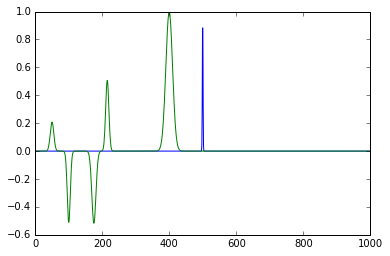

In [102]:
plt.plot(P)
plt.plot(D)
plt.show()